## Q1-导入预置的波士顿房价数据集
- 设置房价为Y，剩余参数为X，30%为测试集
- 用线性回归模型拟合波士顿房价数据集
- 用训练完的模型进行预测
- 输出线性回归模型的斜率和截距

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
X, y = datasets.load_boston(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [5]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
model.predict(X_test)

array([22.61136536, 31.74349207, 11.46414157, 20.72812763, 21.91627265,
        2.73570275, 28.71231396, 23.49217082, 30.14837763, 37.17820727,
       16.60879539, 19.88085305, 35.50065484, 30.94887544, 15.7700112 ,
       16.27119217, 17.43918767, 11.40520803, 22.0738634 , 20.6754559 ,
       17.65673593, 31.01951924, 25.9236425 , 11.10043617, 33.96536195,
       25.44608734, 12.5897702 , 35.01018134, 18.38873648,  6.9732487 ,
       38.60844124, 28.45495985, 20.47997987, 19.56997468, 16.12427705,
       35.9994009 , 27.18423012, 19.32064857, 13.98444086, 29.46052145,
       19.8656528 , 17.17660873, 18.81504602, 26.95388913, 17.80788051,
       15.8639666 , 32.96162544, 33.03077583, 24.53062957, 17.05417842,
       15.78457588, 16.70045735, 25.35099077, 27.86815512, 13.38571776,
       41.68713825, 24.15691534, 32.73186922, 15.78636597, 19.80276635,
       11.9328757 , 19.43889965, 23.11709767, 23.66293254, 20.65424389,
       22.4786409 , 17.05894698, 20.35698044, 18.55048345, 37.26

In [7]:
print(model.coef_)
print(model.intercept_)

[-8.34785576e-02  4.02055901e-02  5.09293022e-02  3.17024364e+00
 -2.00537557e+01  3.58203225e+00  7.00302599e-03 -1.52688342e+00
  3.51721194e-01 -1.58822018e-02 -9.94159447e-01  8.18827811e-03
 -5.57117197e-01]
41.20210111852593


## Q2-使用随机森林对鸢尾花数据集进行预测，n_estimators=100
* 20%为测试集
* 给产生的随机森林模型打分
* 输出模型的classification_report:precision_score、recall_score、f1_score

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
X,y = datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 1, 0, 2, 2, 2])

In [11]:
clf.score(X,y)

0.98

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.78      0.88      0.82         8
           2       0.92      0.86      0.89        14

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



## Q3-生成一组数据，10000个样本，3个特征，4个簇
- 对数据进行pca同纬度数量的投影，展示投影后的三个维度的分布
- 将3维数据降到2维
- 指定降维后主成分方差的比例（99%）进行降维

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [22]:
X, y = datasets.make_blobs(n_samples=10000, n_features=3, centers=[[3,3,3], [0,0,0], [1,1,1], [2,2,2]], 
                           cluster_std=[0.2, 0.1, 0.2, 0.2], random_state = 42)

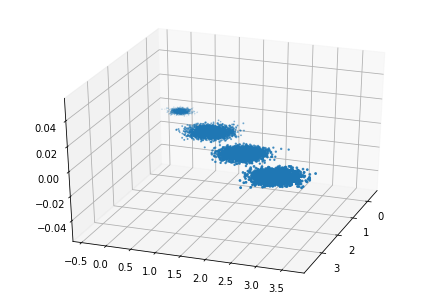

In [24]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

In [25]:
pca = PCA(n_components=3)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

[0.982957   0.00867876 0.00836424]
[3.77602199 0.03333939 0.03213118]


[0.982957   0.00867876]
[3.77602199 0.03333939]


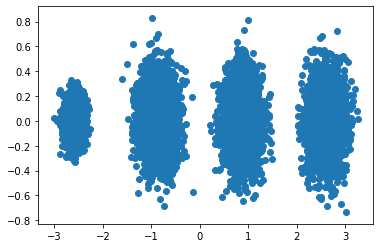

In [26]:
pca = PCA(n_components=2)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)

X_new = pca.transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o')
plt.show()

In [27]:
pca = PCA(n_components=0.99)
pca.fit(X)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print (pca.n_components_)

[0.982957   0.00867876]
[3.77602199 0.03333939]
2
